In [99]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set(style="darkgrid")

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [100]:
BASELINE_MODELS = ['ARIMA', 'ETS', 'PROPHET', 'Naive']

In [101]:
results = pd.read_csv(os.getcwd() + '/final_results.csv')
results

,periodicity,category,is_seasonal,is_stationary,fh,ARIMA_wins_percent,ETS_wins_percent,PROPHET_wins_percent,Naive_wins_percent,DynamicRegression_wins_percent,SeasonalDynamicRegression_wins_percent,best_model,DynamicRegression_vs_ARIMA,DynamicRegression_vs_ETS,DynamicRegression_vs_PROPHET,DynamicRegression_vs_Naive,SeasonalDynamicRegression_vs_ARIMA,SeasonalDynamicRegression_vs_ETS,SeasonalDynamicRegression_vs_PROPHET,SeasonalDynamicRegression_vs_Naive
0,H,Other,False,False,long-step,0.060000,0.005000,0.135000,0.205000,0.490000,0.550000,SeasonalDynamicRegression,True,True,True,True,True,True,True,True
1,H,Other,False,False,many-steps,0.130000,0.000000,0.870000,0.000000,0.000000,0.000000,PROPHET,False,True,False,True,False,True,False,True
2,H,Other,False,False,one-step,0.310000,0.090000,0.545000,0.025000,0.025000,0.015000,PROPHET,False,False,False,True,False,False,False,True
3,D,Finance,True,False,long-step,0.182320,0.143646,0.077348,0.154696,0.220994,0.348066,SeasonalDynamicRegression,True,True,True,True,True,True,True,True
4,D,Finance,True,False,many-steps,0.198895,0.149171,0.000000,0.160221,0.292818,0.375691,SeasonalDynamicRegression,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Y,Other,True,False,many-steps,0.162162,0.135135,0.081081,0.108108,0.513514,NaN,DynamicRegression,True,True,True,True,NaN,NaN,NaN,NaN
173,Y,Other,True,False,one-step,0.165829,0.160804,0.180905,0.105528,0.391960,NaN,DynamicRegression,True,True,True,True,NaN,NaN,NaN,NaN
174,Y,Other,True,True,long-step,0.272727,0.121212,0.060606,0.151515,0.393939,NaN,DynamicRegression,True,True,True,True,NaN,NaN,NaN,NaN
175,Y,Other,True,True,many-steps,0.333333,0.090909,0.030303,0.121212,0.424242,NaN,DynamicRegression,True,True,True,True,NaN,NaN,NaN,NaN


### Разбиение по периодичности

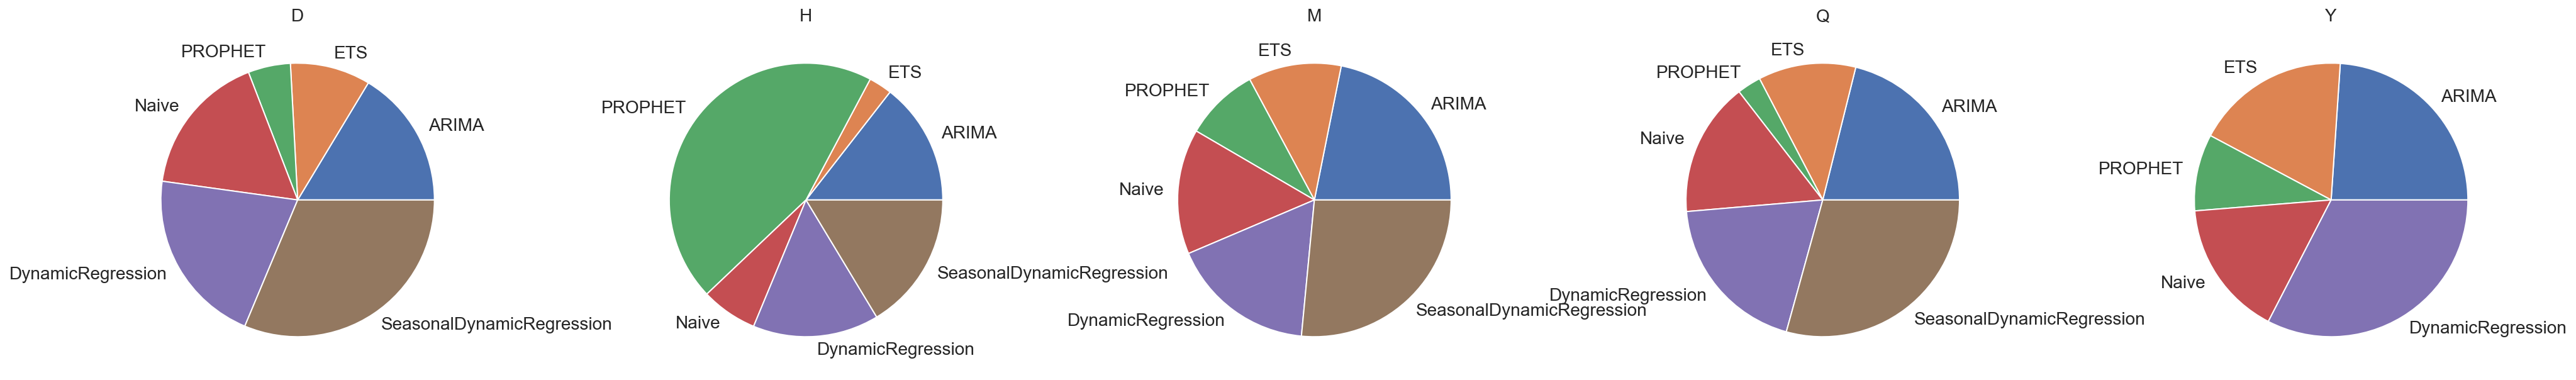

In [102]:
fig, axes = plt.subplots(1, 5, figsize=(35, 5))
dataset = results[['periodicity', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('periodicity').mean()
for i, (periodicity, data) in enumerate(dataset.iterrows()):
    if periodicity == 'Y':
        data = data.drop('SeasonalDynamicRegression_wins_percent')
    axes[i].set_title(periodicity)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])
fig.savefig(fname='wins-periodicity.pdf', format='pdf')
plt.show()

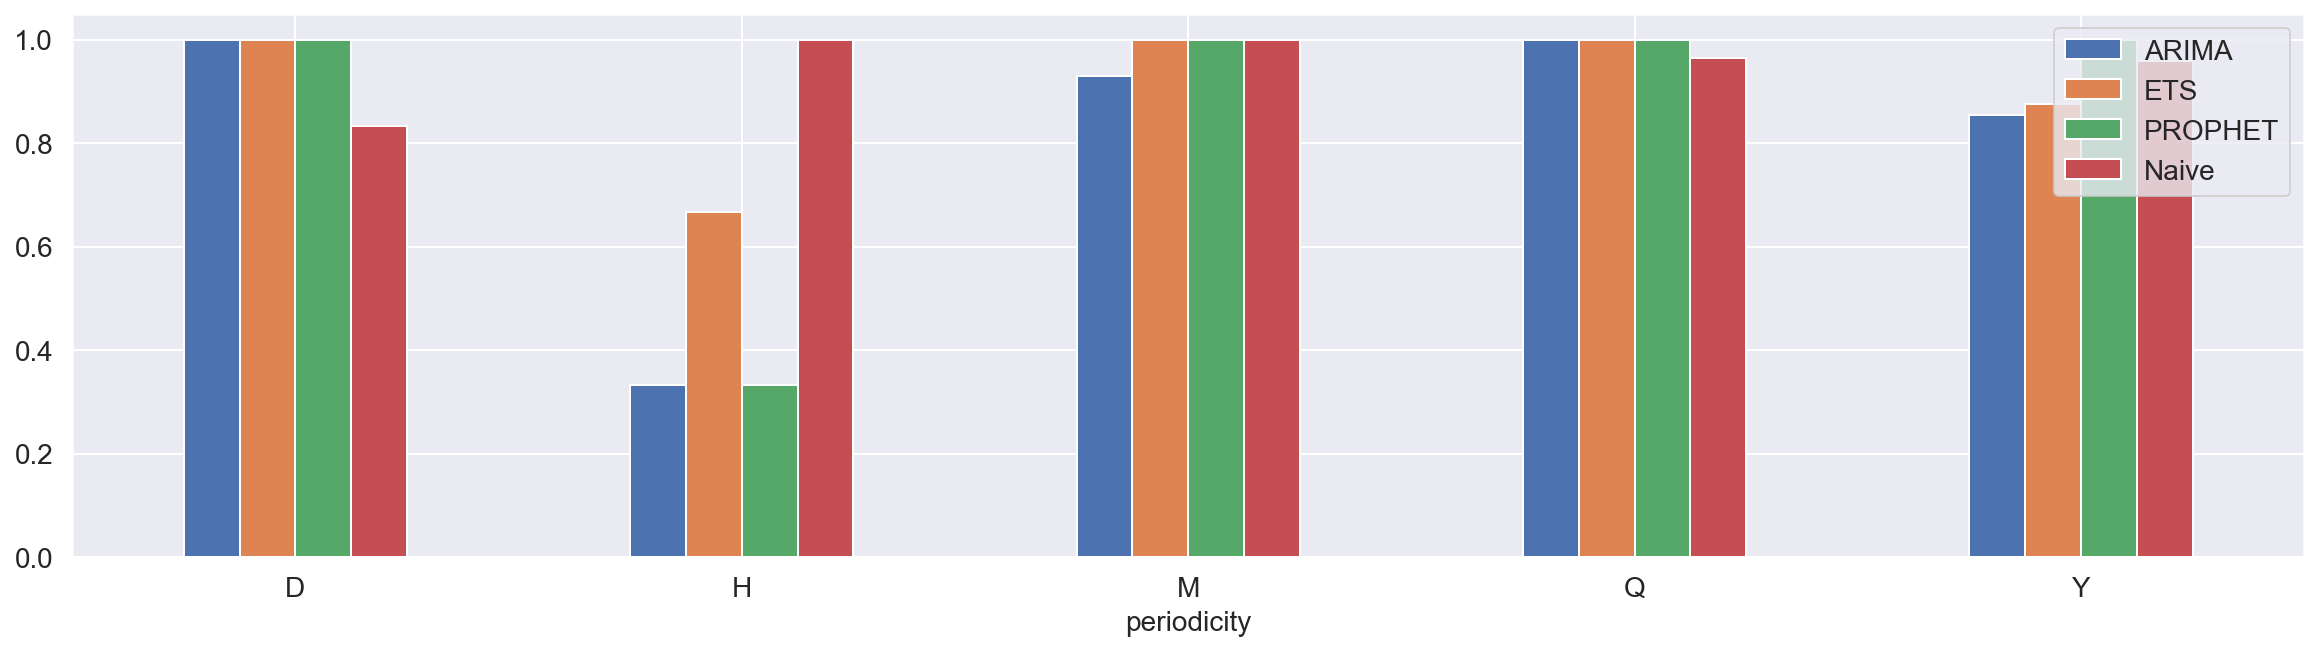

In [103]:
dataset = results[['periodicity', *['DynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('periodicity').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-dynreg-periodicity.pdf', format='pdf')
plt.show()

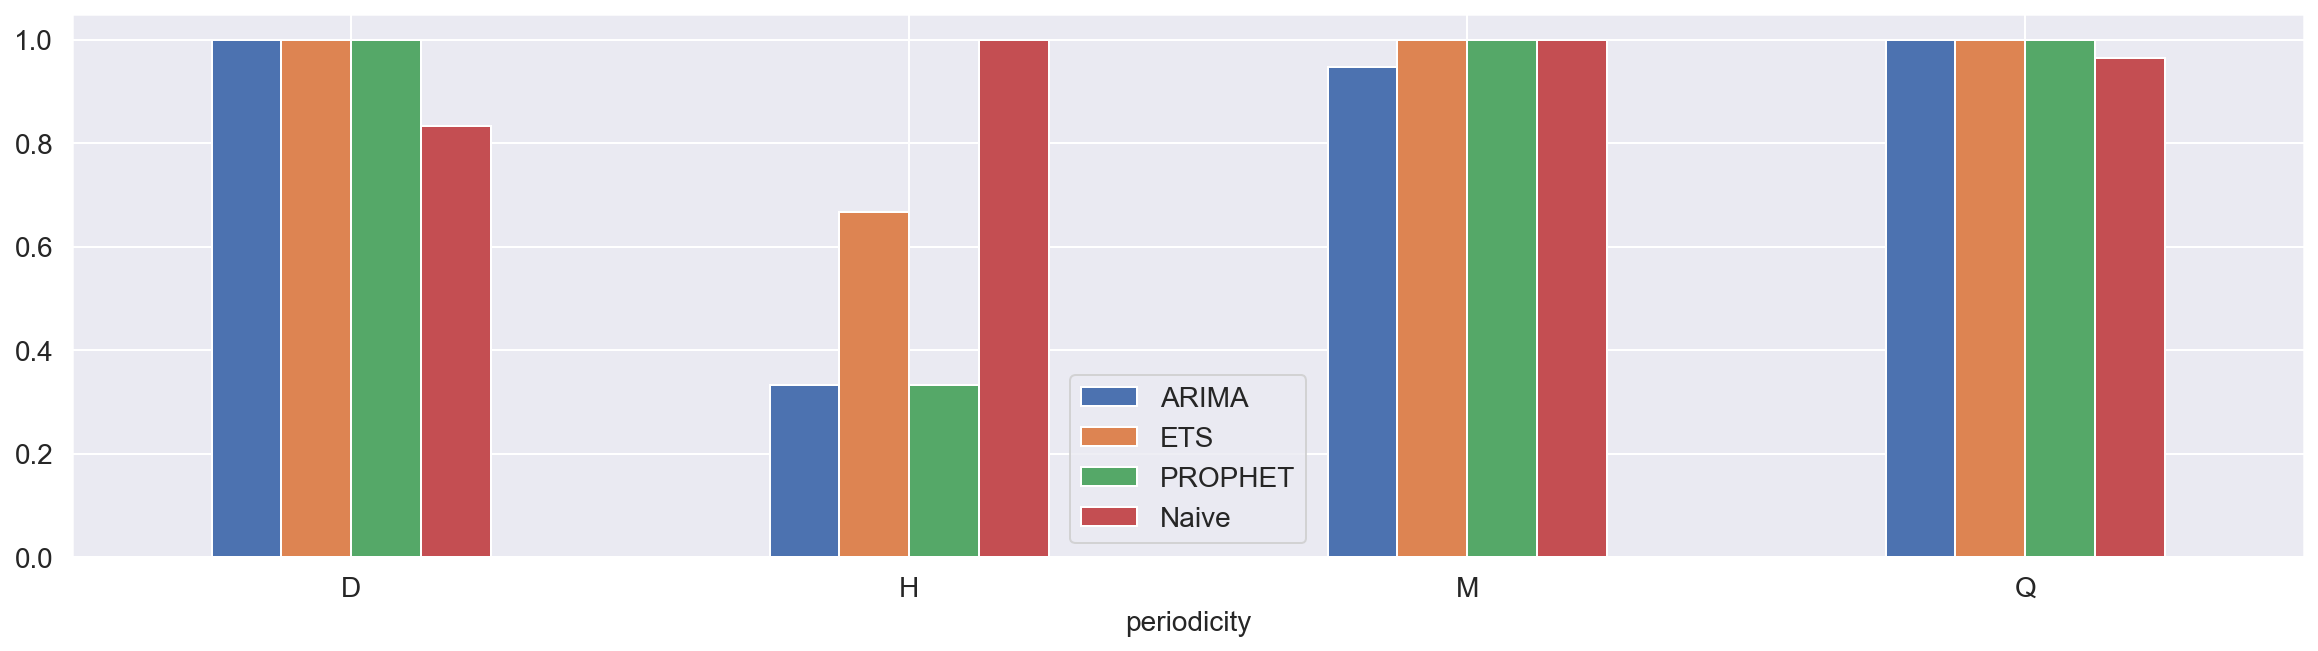

In [104]:
dataset = results[['periodicity', *['SeasonalDynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('periodicity').mean().drop('Y')
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-seasdynreg-periodicity.pdf', format='pdf')
plt.show()

### Разбиение по категории

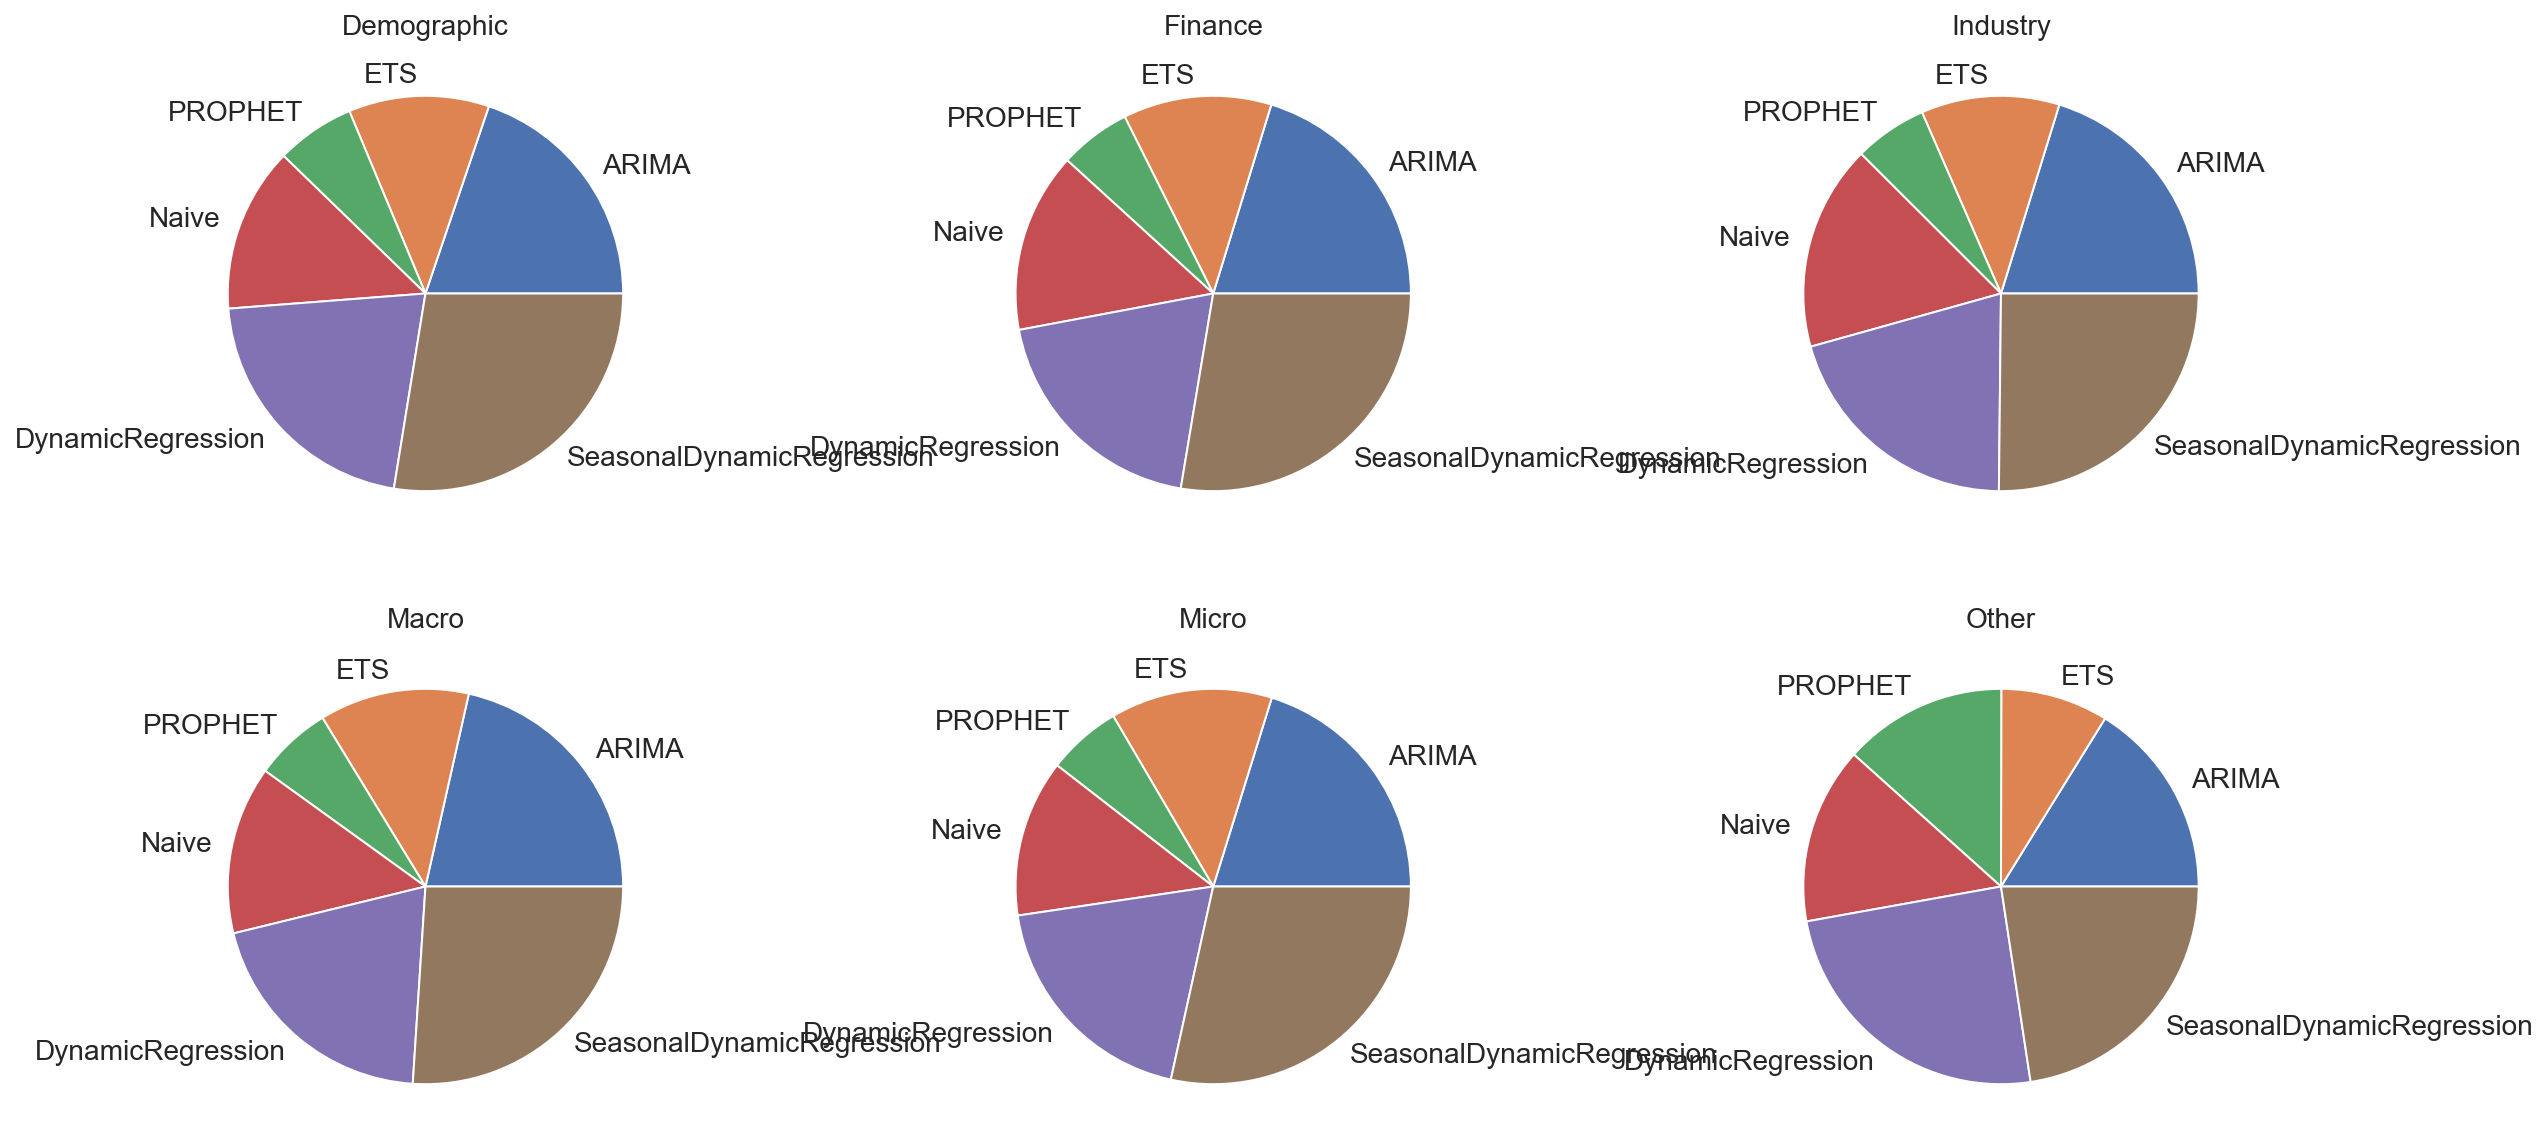

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = [*axes[0], *axes[1]]
dataset = results[['category', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('category').mean()
for i, (category, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(category)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])
fig.savefig(fname='wins-category.pdf', format='pdf')
plt.show()

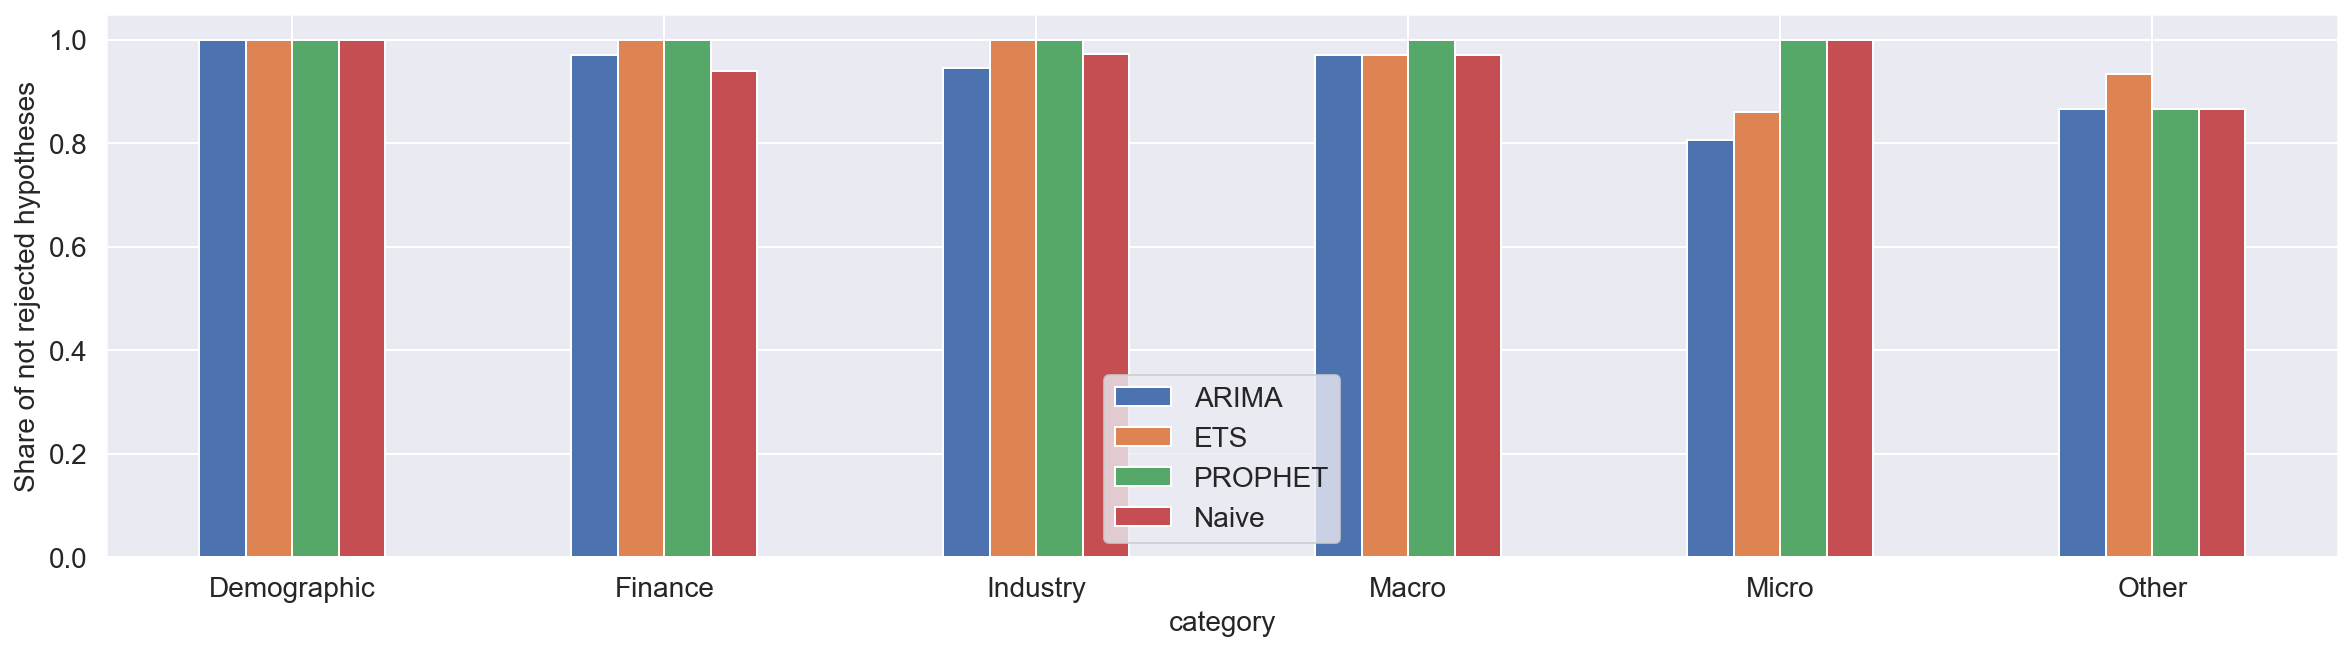

In [106]:
dataset = results[['category', *['DynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('category').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-dynreg-category.pdf', format='pdf')
plt.show()

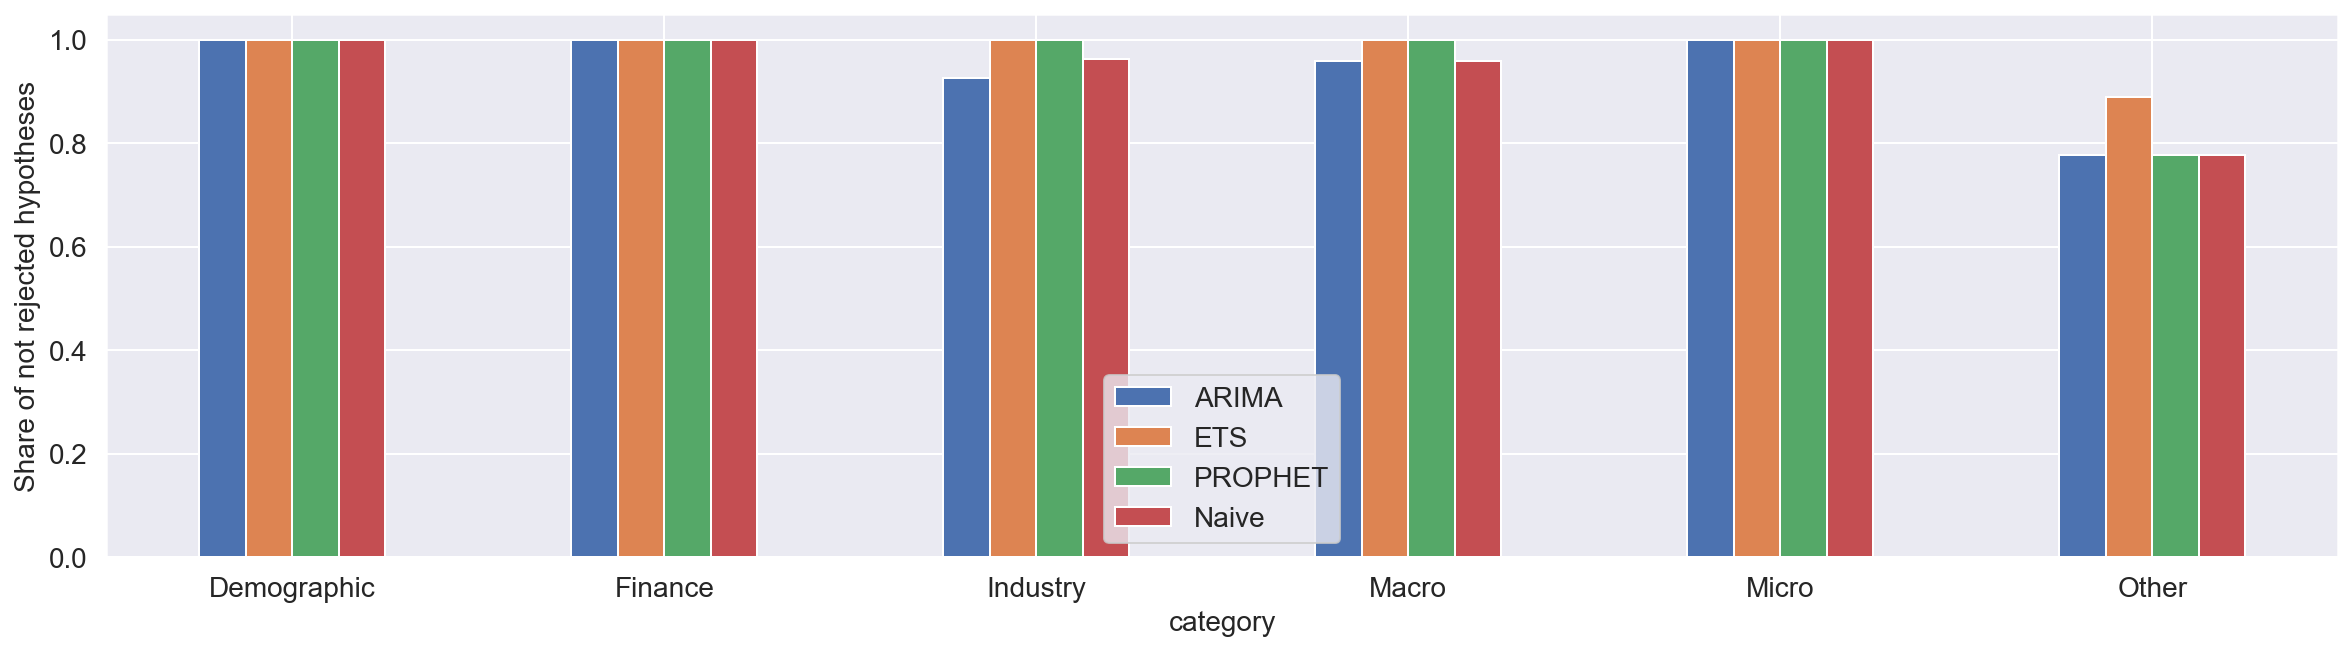

In [107]:
dataset = results[['category', *['SeasonalDynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('category').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-seasdynreg-category.pdf', format='pdf')
plt.show()

### Разбиение по сезонности

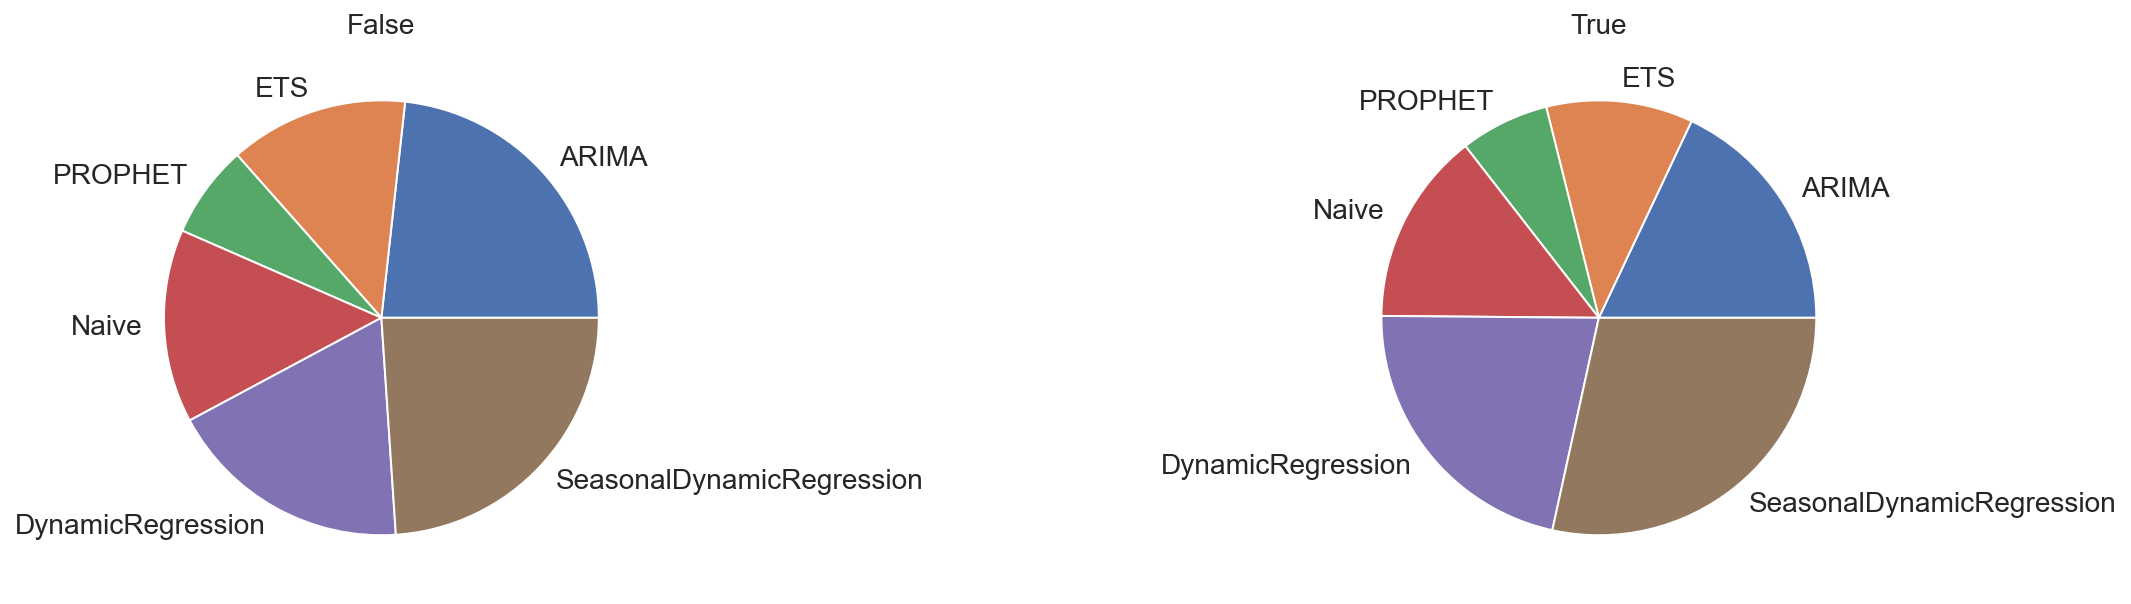

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
dataset = results[['is_seasonal', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('is_seasonal').mean()
for i, (is_seasonal, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(is_seasonal)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])
fig.savefig(fname='wins-seasonality.pdf', format='pdf')
plt.show()

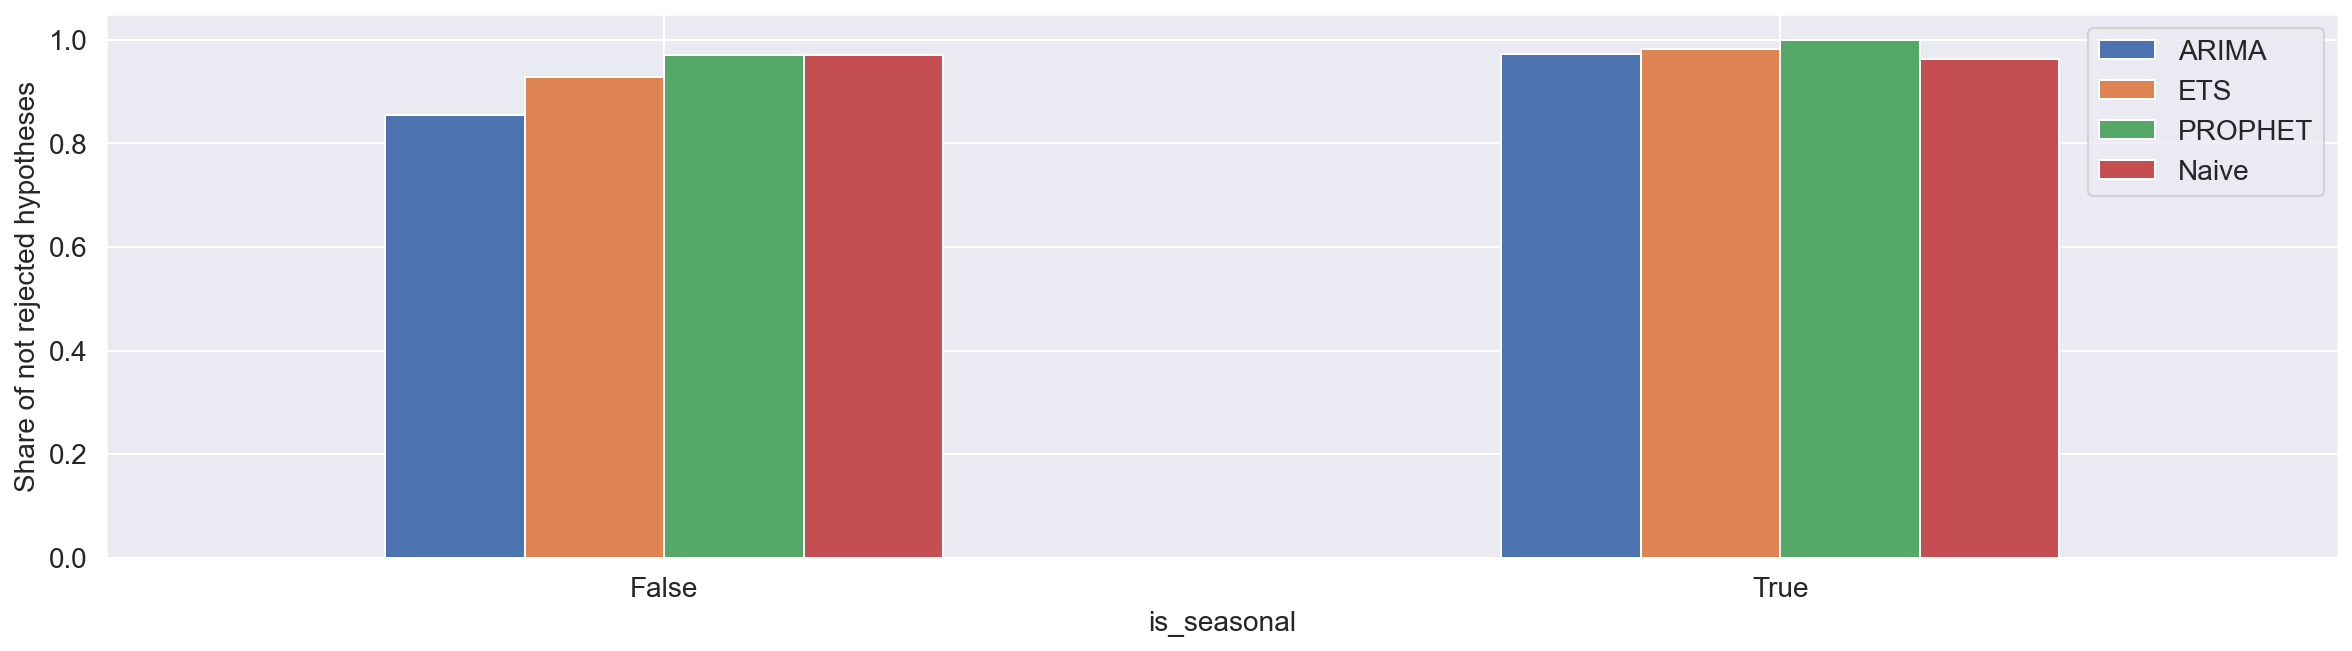

In [109]:
dataset = results[['is_seasonal', *['DynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('is_seasonal').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-dynreg-seasonality.pdf', format='pdf')
plt.show()

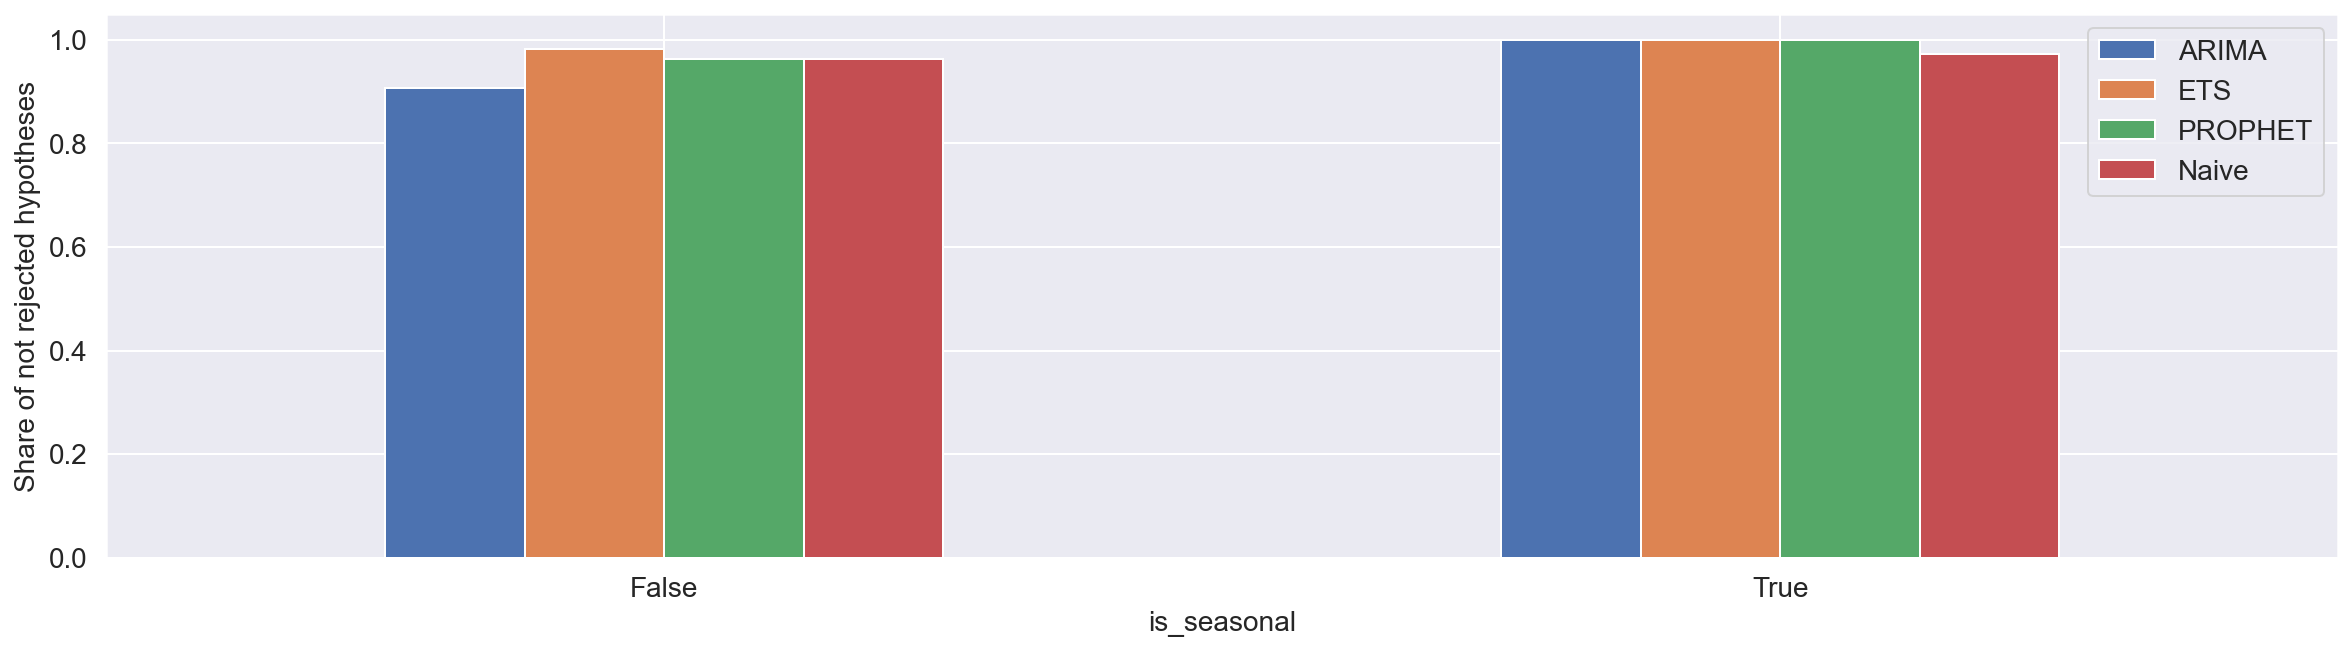

In [110]:
dataset = results[['is_seasonal', *['SeasonalDynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('is_seasonal').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]

dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-seasdynreg-seasonality.pdf', format='pdf')
plt.show()

### Разбиение по стационарности

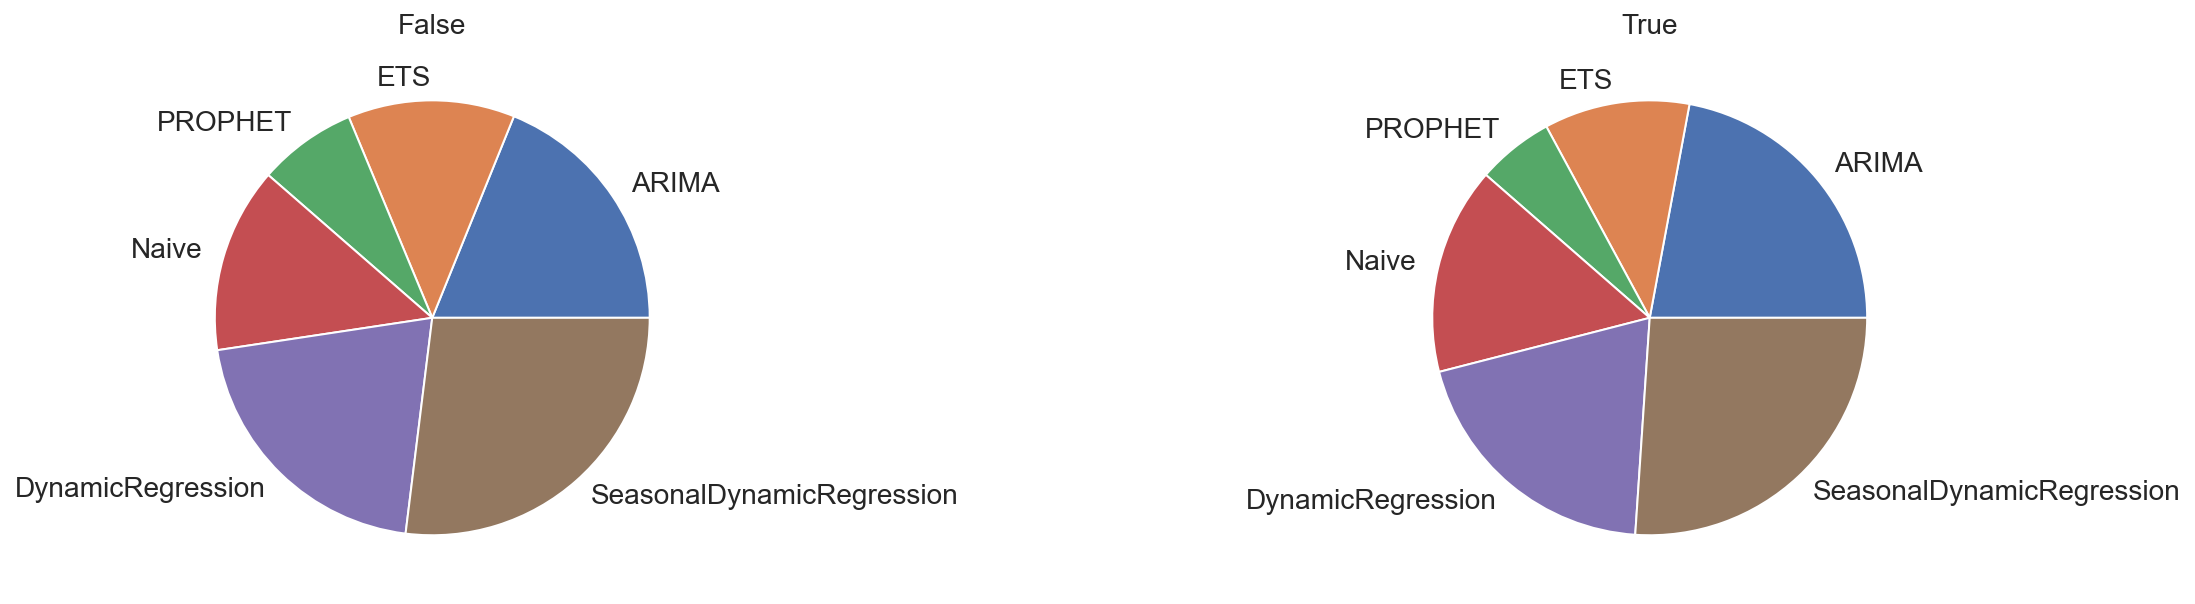

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
dataset = results[['is_stationary', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('is_stationary').mean()
for i, (is_stationary, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(is_stationary)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])
fig.savefig(fname='wins-stationarity.pdf', format='pdf')
plt.show()

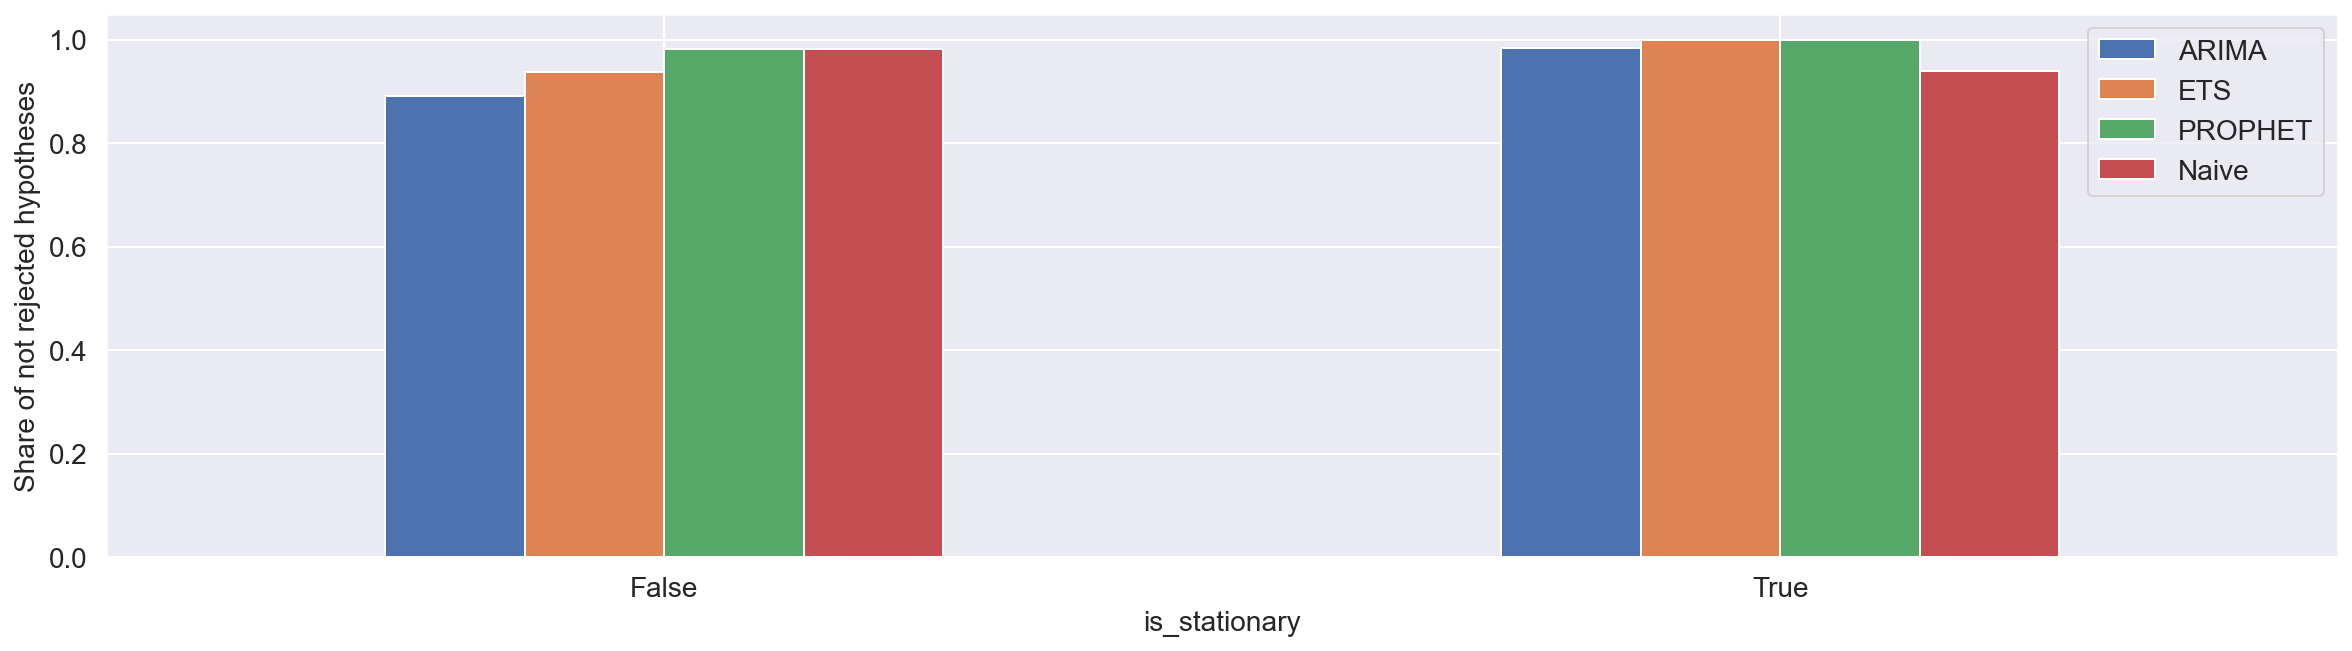

In [112]:
dataset = results[['is_stationary', *['DynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('is_stationary').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-dynreg-stationarity.pdf', format='pdf')
plt.show()

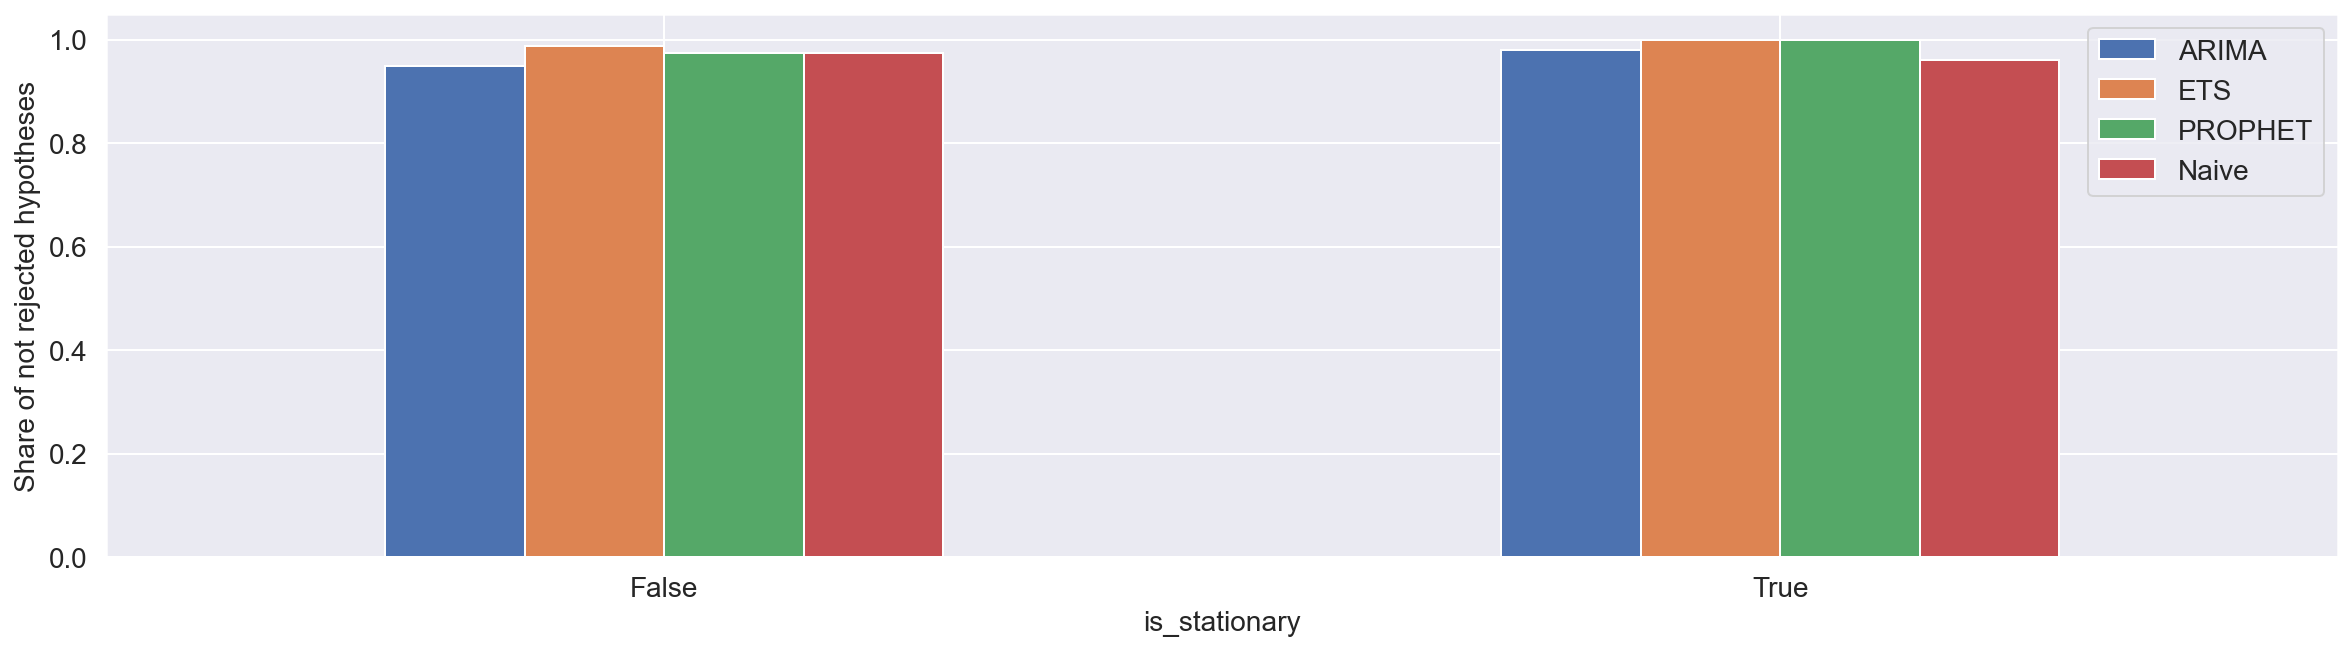

In [113]:
dataset = results[['is_stationary', *['SeasonalDynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('is_stationary').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-seasdynreg-stationarity.pdf', format='pdf')
plt.show()

### Разбиение по горизонту прогнозирования

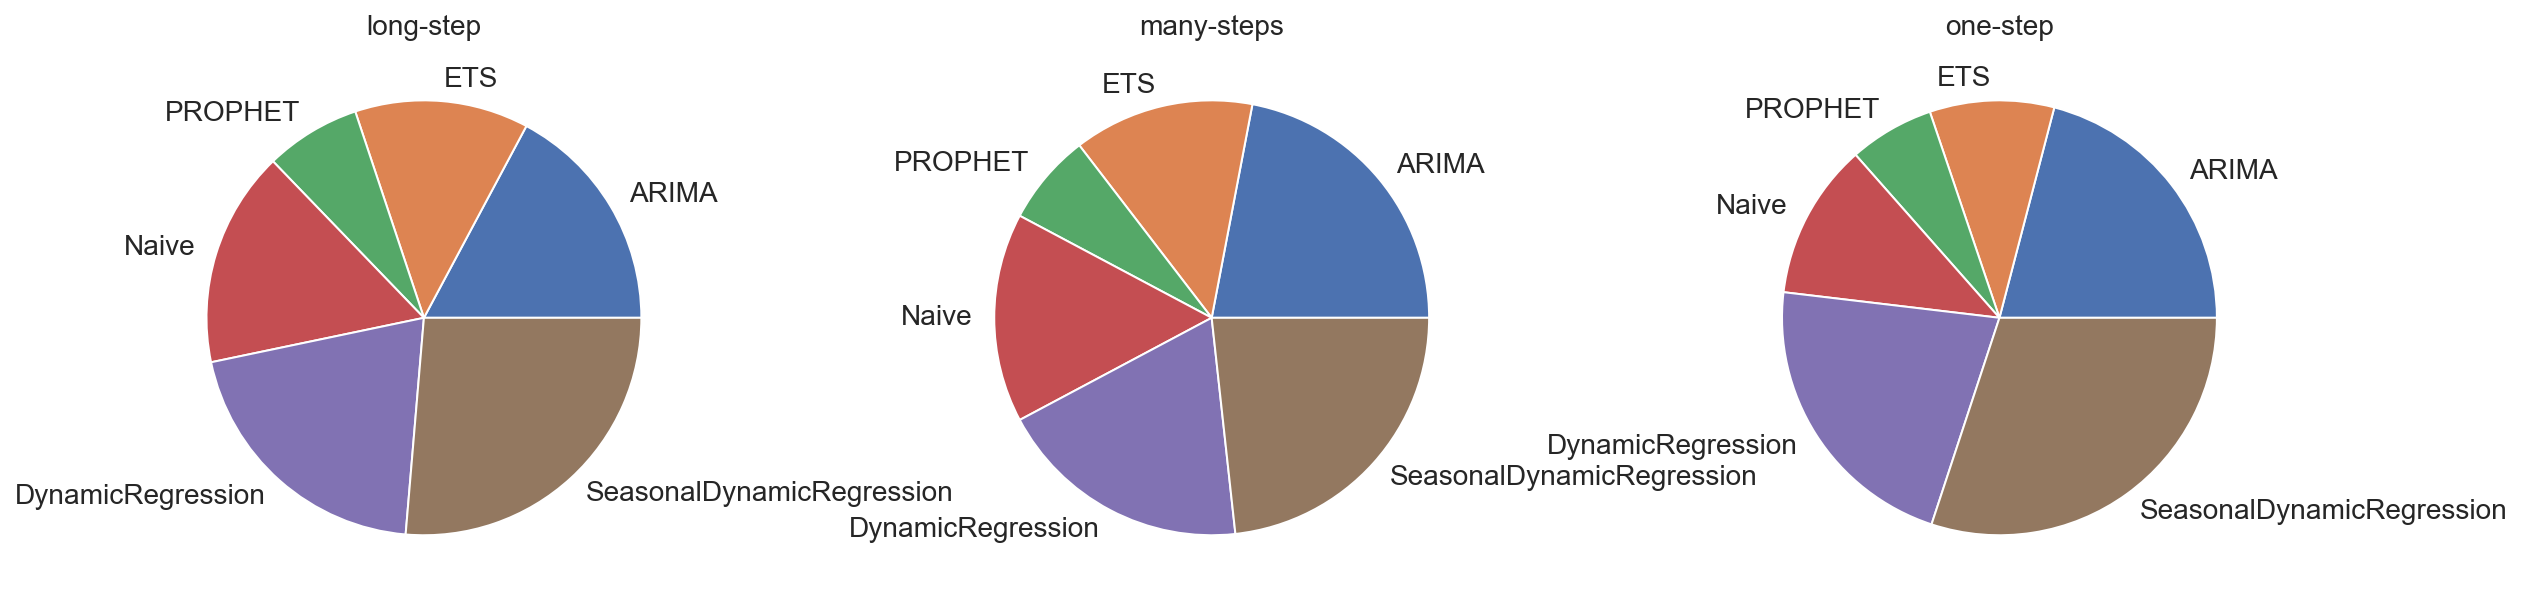

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
dataset = results[['fh', 'ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.groupby('fh').mean()
for i, (fh, data) in enumerate(dataset.iterrows()):
    axes[i].set_title(fh)
    axes[i].pie(data.values, labels=data.index.str.split('_').str[0])
fig.savefig(fname='wins-fh.pdf', format='pdf')
plt.show()

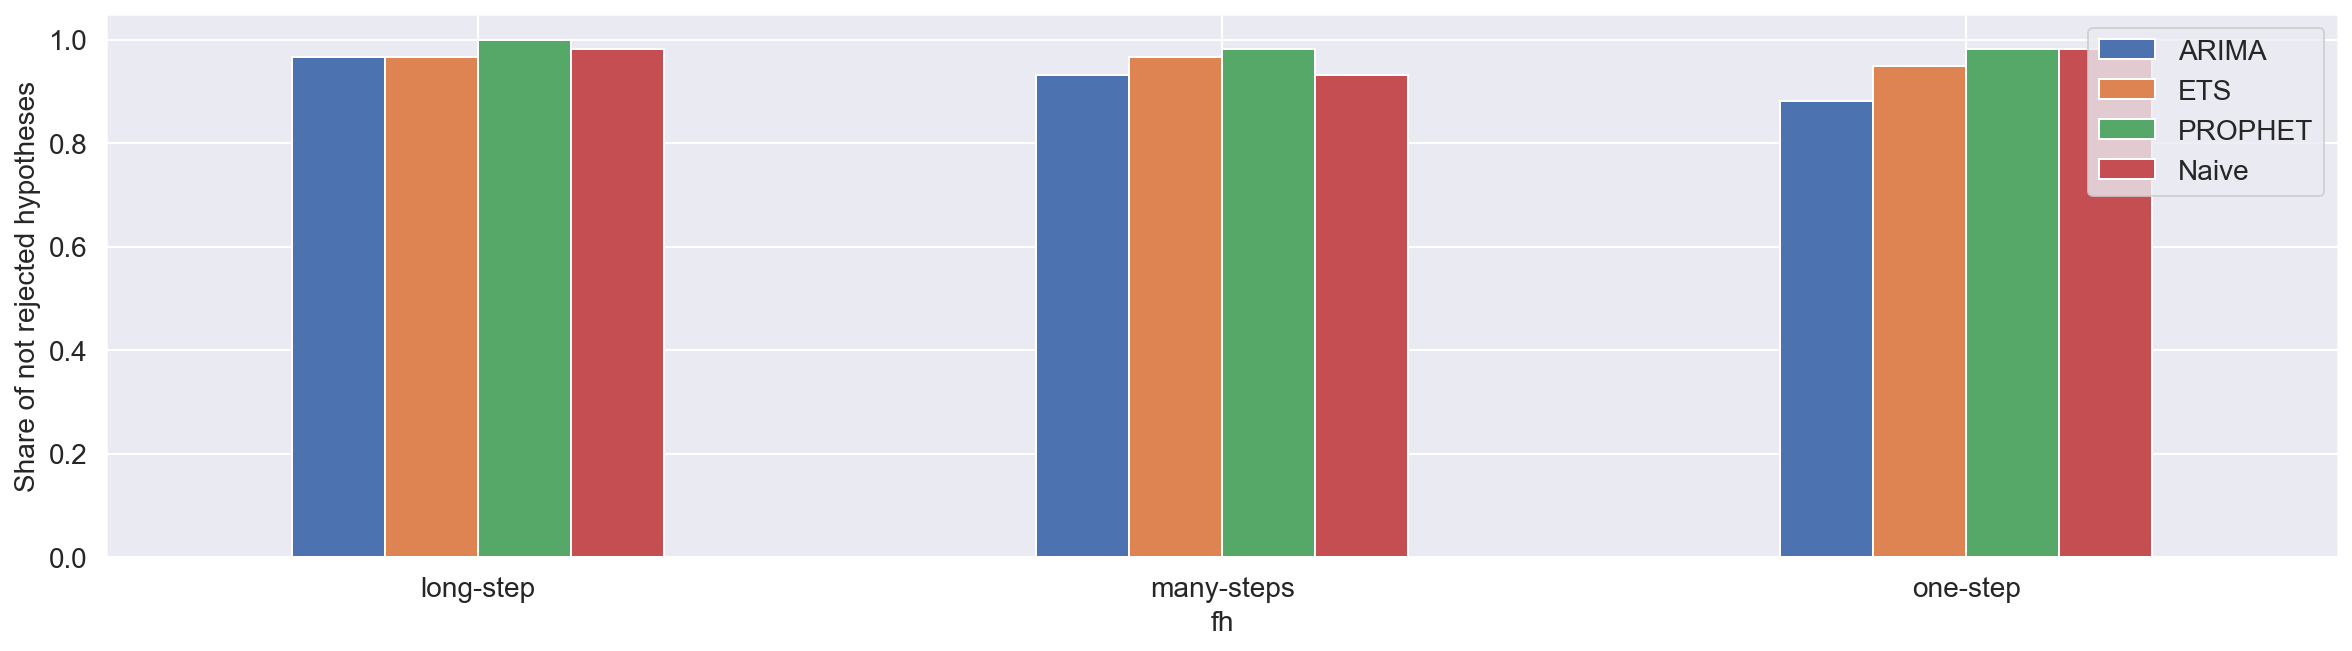

In [115]:
dataset = results[['fh', *['DynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('fh').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-dynreg-fh.pdf', format='pdf')
plt.show()

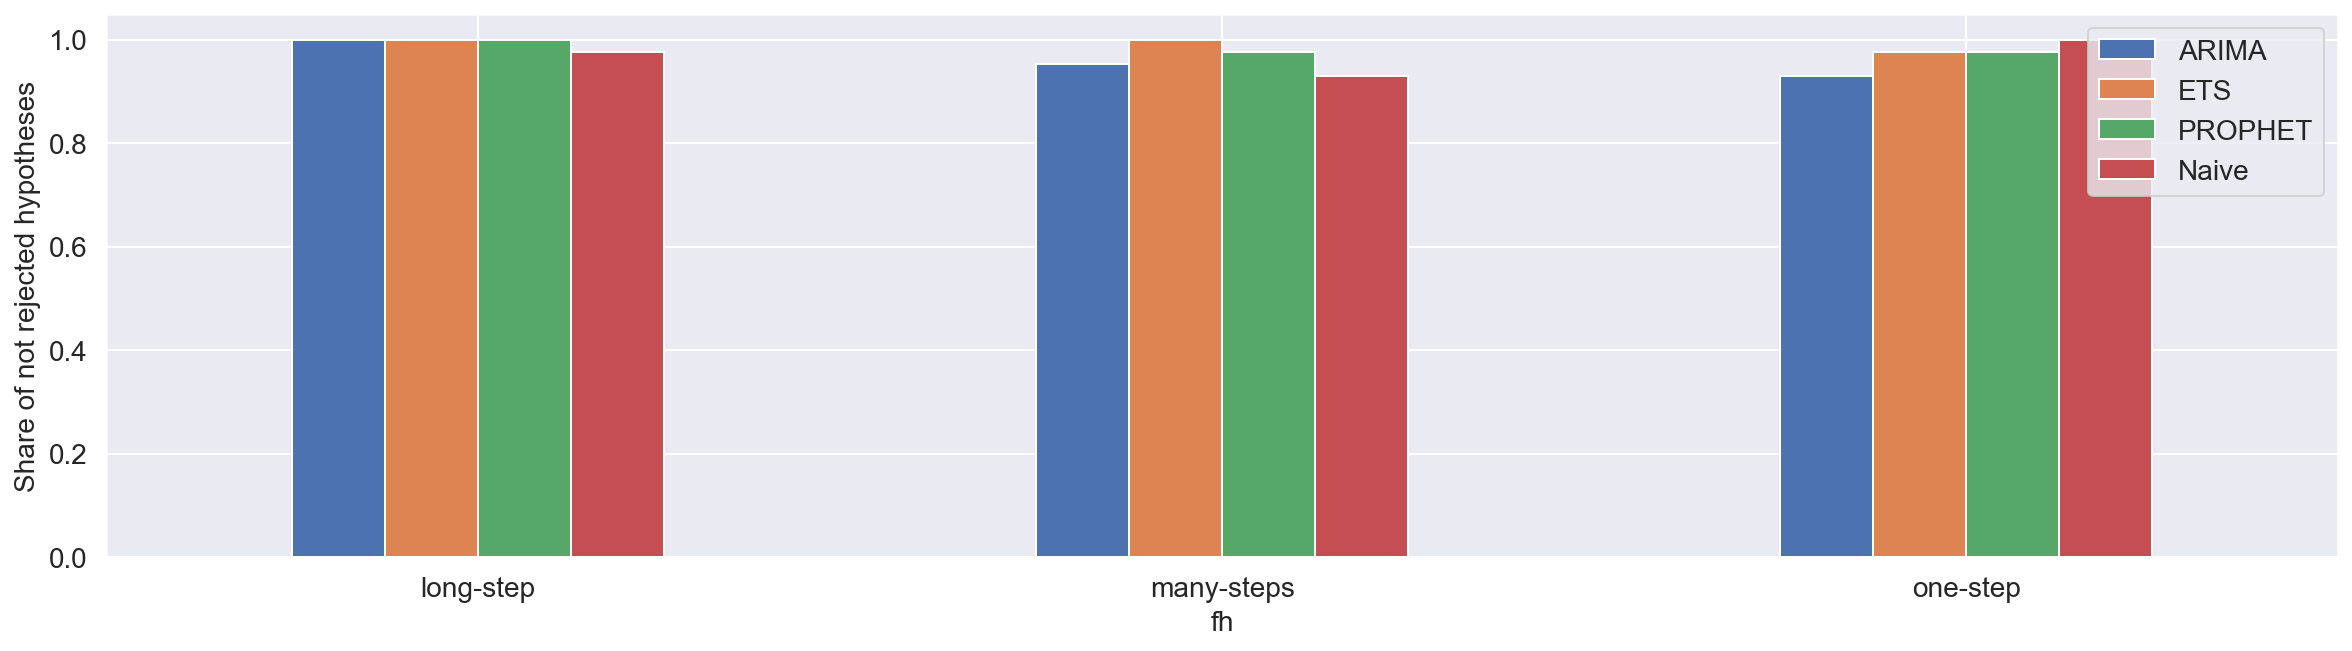

In [116]:
dataset = results[['fh', *['SeasonalDynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.groupby('fh').mean()
dataset.columns = dataset.columns.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-seasdynreg-fh.pdf', format='pdf')
plt.show()

### Все данные

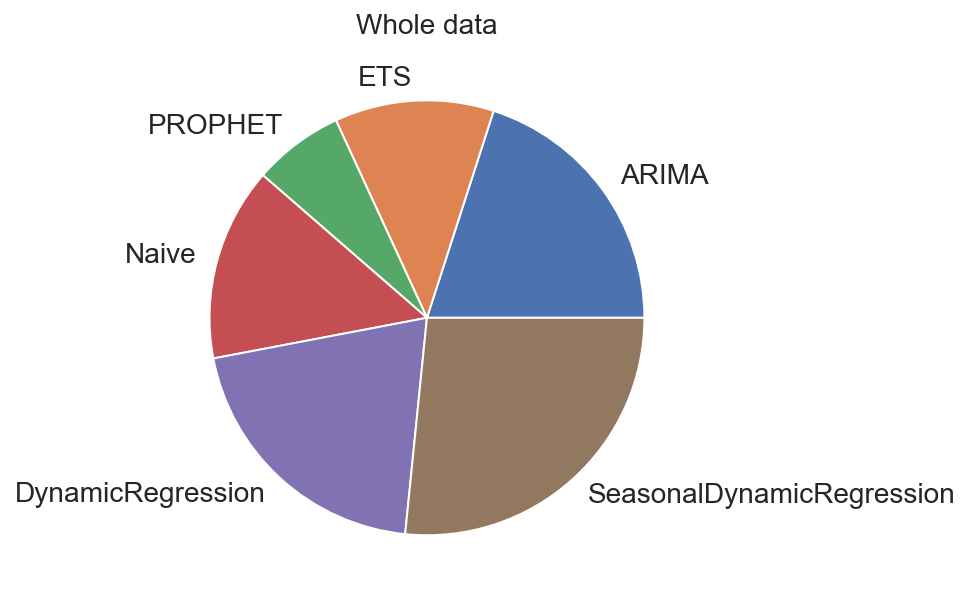

In [117]:
dataset = results[['ARIMA_wins_percent', 'ETS_wins_percent', 'PROPHET_wins_percent', 'Naive_wins_percent', 'DynamicRegression_wins_percent', 'SeasonalDynamicRegression_wins_percent']]
dataset = dataset.mean(axis=0)
plt.title("Whole data")
plt.pie(dataset.values, labels=data.index.str.split('_').str[0])
plt.gcf().savefig(fname='wins-full.pdf', format='pdf')
plt.show()

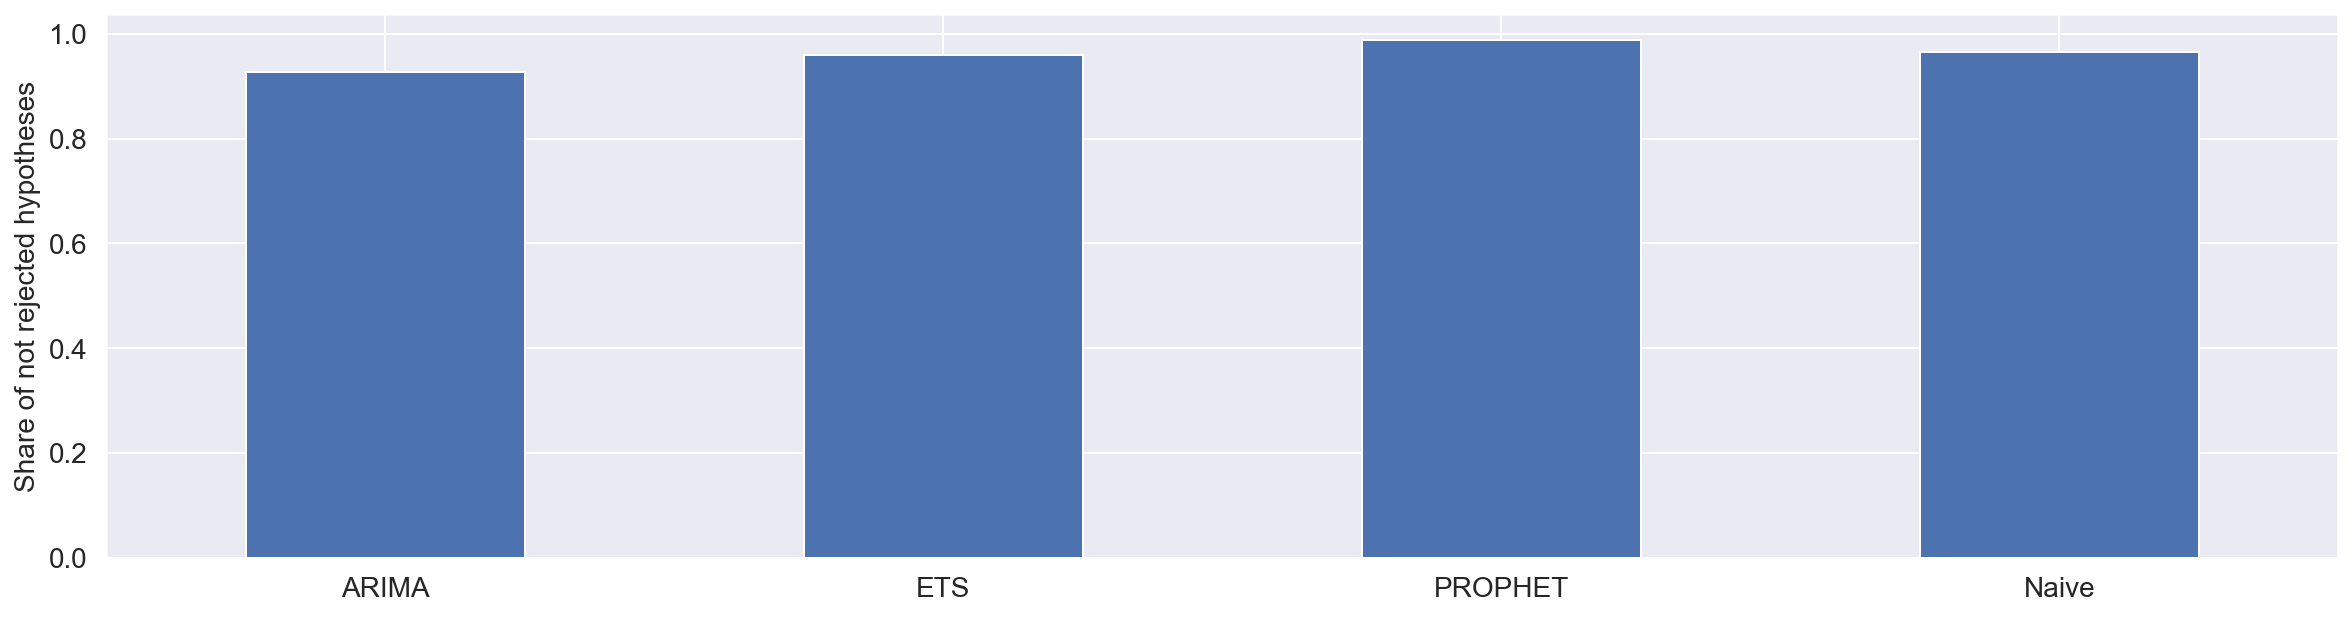

In [118]:
dataset = results[[*['DynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.mean()
dataset.index = dataset.index.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-dynreg-full.pdf', format='pdf')
plt.show()

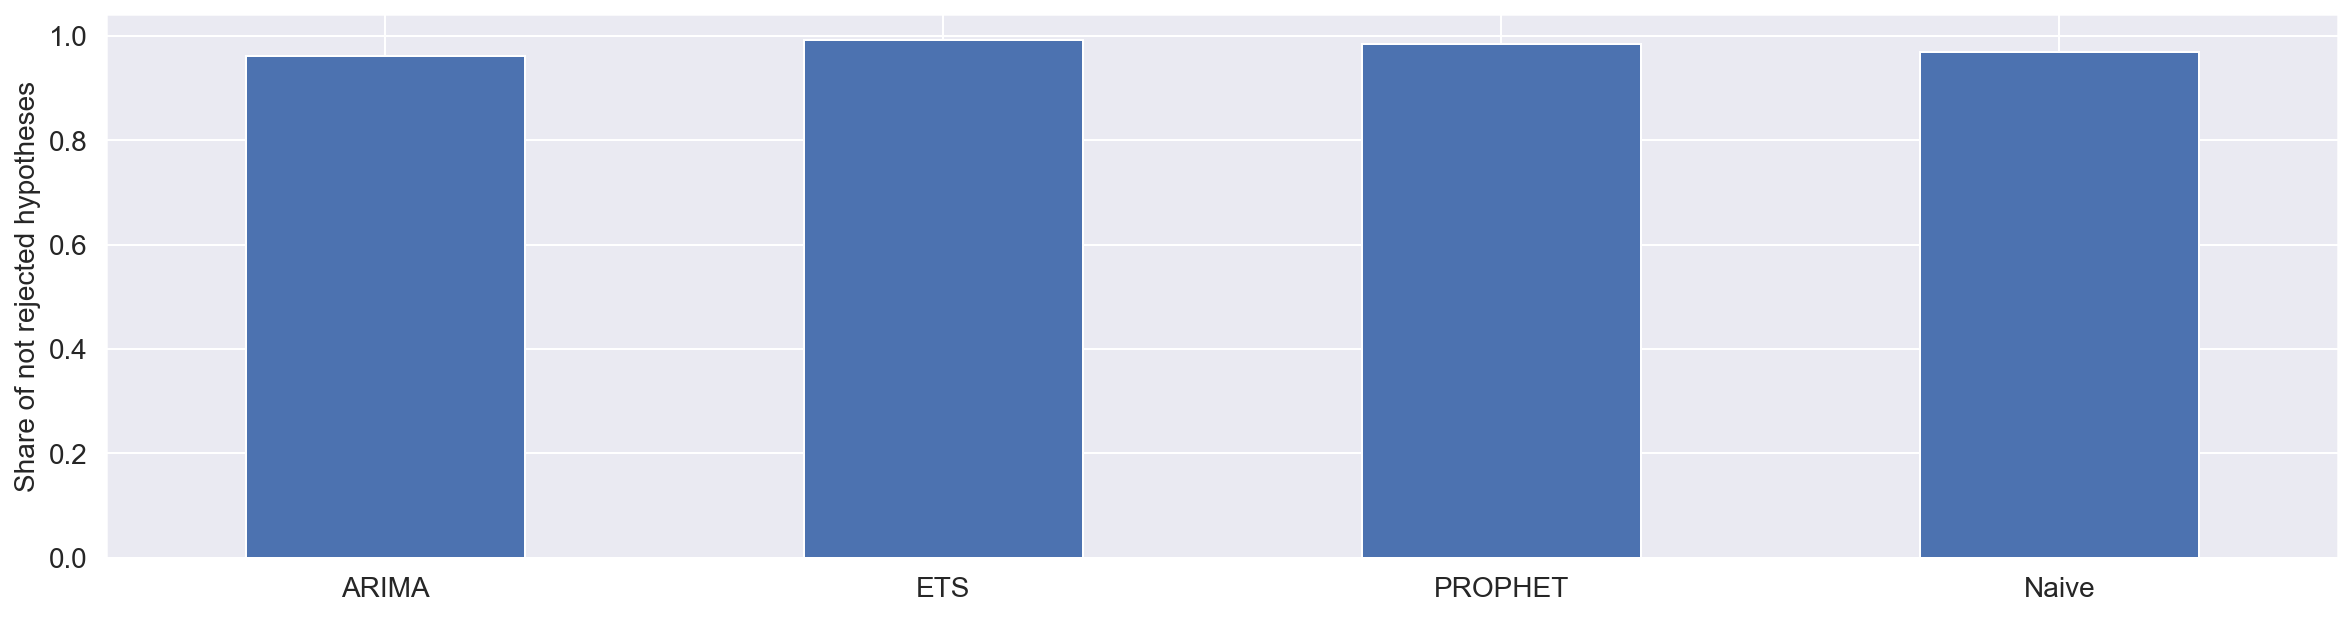

In [119]:
dataset = results[[*['SeasonalDynamicRegression_vs_' + model for model in BASELINE_MODELS]]]
dataset = dataset.mean()
dataset.index = dataset.index.str.split('_').str[-1]
dataset.plot.bar()
plt.ylabel("Share of not rejected hypotheses")
plt.xticks(rotation=0)
plt.gcf().savefig(fname='results-seasdynreg-full.pdf', format='pdf')
plt.show()

In [120]:
dataset

ARIMA      0.961240
ETS        0.992248
PROPHET    0.984496
Naive      0.968992
dtype: float64